In [44]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [45]:
df = pd.read_csv("train.csv")

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\Alex\anaconda3\envs\XUncertainty\lib\site-packages\numpy\lib\histograms.py:836: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Alex\anaconda3\envs\XUncertainty\lib\site-packages\numpy\lib\histograms.py:837: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 18.,  16.,  99., 110.,  64.,  45.,  38.,  15.,  13.,   6.]),
 array([1.0, 8.3, 15.6, 22.9, 30.2, 37.5, 44.8, 52.1, 59.4, 66.7, 74.0],
       dtype=object),
 <BarContainer object of 10 artists>)

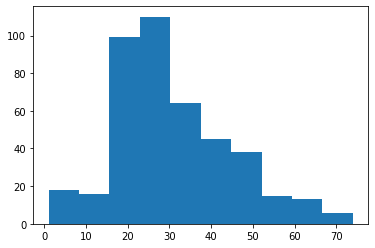

In [63]:
df0 = df[df["Survived"] == 0]
df1 = df[df["Survived"] == 1]

y0 = df0.to_numpy()[:,5]


plt.hist(y0, bins=10)

In [33]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
#dropping ID and Names because they aren't a relevant information
df.drop(columns=["PassengerId", "Name"], inplace=True)

#dropping cabin because there is too much missing information
df.drop(columns=["Cabin"], inplace=True)

In [35]:
# ------------MISSING_VALUES------------------ #
#You can either use a dataframe method (pandas), or scikit's Simple Imputer.
df['Age'].fillna(df['Age'].mean(), inplace=True)
# imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# df["Age"] = imp.fit_transform(df[["Age"]])


#Either you imput the most_frequent, or you remove the data. In this case, only 2 rows have missing values, so we'll remove, but here is the code incase you want to see how it's done.
df.dropna(inplace=True)
# imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# df["Embarked"] = imp.fit_transform(df[["Embarked"]])

In [36]:
#Sex
dic = {'male': 1, 'female': 0}
df['Sex'] = df['Sex'].map(dic)
#You can also use the following: df['Sex'] = pd.get_dummies(df['Sex'],drop_first=True)

embarked_encoded = pd.get_dummies(df['Embarked'])
df = pd.concat([df,embarked_encoded],axis=1)

#you can also use the following code:
    # ohe = OneHotEncoder()
    # emb_ohe = ohe.fit_transform(df[["Embarked"]]).toarray()
    # df_emb = pd.DataFrame(emb_ohe, columns=["C","Q","S"])
    # df = pd.concat([df, df_emb], axis=1)

df.drop(columns=["Embarked"], inplace=True)

In [37]:
#Making sure one hot works correctly
df[:6]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,0,3,1,22.000000,1,0,A/5 21171,7.2500,0,0,1
1,1,1,0,38.000000,1,0,PC 17599,71.2833,1,0,0
2,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,1,0,35.000000,1,0,113803,53.1000,0,0,1
4,0,3,1,35.000000,0,0,373450,8.0500,0,0,1
5,0,3,1,29.699118,0,0,330877,8.4583,0,1,0


In [38]:
df.drop(columns=["Ticket"], inplace=True)

In [39]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [65]:
df = pd.read_csv("test.csv")
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64